# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [5]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [171]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,1.591240,1.020165,1.00,1.00,1.00,2.00,9.0
purchase_lead,50000.0,84.940480,90.451378,0.00,21.00,51.00,115.00,867.0
length_of_stay,50000.0,23.044560,33.887670,0.00,5.00,17.00,28.00,778.0
flight_hour,50000.0,9.066340,5.412660,0.00,5.00,9.00,13.00,23.0
flight_day,50000.0,3.814420,1.992792,1.00,2.00,4.00,5.00,7.0
wants_extra_baggage,50000.0,0.668780,0.470657,0.00,0.00,1.00,1.00,1.0
wants_preferred_seat,50000.0,0.296960,0.456923,0.00,0.00,0.00,1.00,1.0
wants_in_flight_meals,50000.0,0.427140,0.494668,0.00,0.00,0.00,1.00,1.0
flight_duration,50000.0,7.277561,1.496863,4.67,5.62,7.57,8.83,9.5
booking_complete,50000.0,0.149560,0.356643,0.00,0.00,0.00,0.00,1.0


In [172]:
df.describe(include='object').T

,count,unique,top,freq
sales_channel,50000,2,Internet,44382
trip_type,50000,3,RoundTrip,49497
route,50000,799,AKLKUL,2680
booking_origin,50000,104,Australia,17872


In [6]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [7]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5], dtype=int64)

In [173]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,NaN,NaN,NaN,1.59124,1.020165,1.0,1.0,1.0,2.0,9.0
sales_channel,50000,2,Internet,44382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_type,50000,3,RoundTrip,49497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_lead,50000.0,NaN,NaN,NaN,84.94048,90.451378,0.0,21.0,51.0,115.0,867.0
length_of_stay,50000.0,NaN,NaN,NaN,23.04456,33.88767,0.0,5.0,17.0,28.0,778.0
flight_hour,50000.0,NaN,NaN,NaN,9.06634,5.41266,0.0,5.0,9.0,13.0,23.0
flight_day,50000.0,NaN,NaN,NaN,3.81442,1.992792,1.0,2.0,4.0,5.0,7.0
route,50000,799,AKLKUL,2680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booking_origin,50000,104,Australia,17872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wants_extra_baggage,50000.0,NaN,NaN,NaN,0.66878,0.470657,0.0,0.0,1.0,1.0,1.0


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

#### Importing Libraries

In [33]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [15]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [16]:
df.booking_complete.value_counts()

booking_complete
0    42522
1     7478
Name: count, dtype: int64

Text(0.5, 1.0, "Distribution of variable_cible='booking_complete")

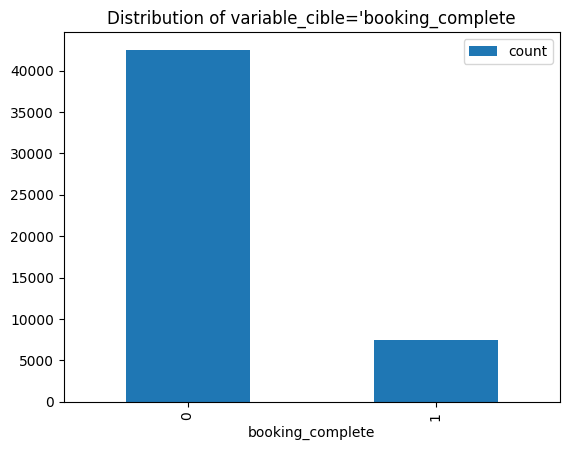

In [175]:
df.booking_complete.value_counts().plot(kind='bar').legend()
plt.title("Distribution of variable_cible='booking_complete")

In [24]:
# RESAMPLING
from sklearn.utils import resample

# séparer les données en classe majoritaire et minoritaire
majority_class = df[df.booking_complete == 0]
minority_class = df[df.booking_complete == 1]

# augmenter la taille de la classe minoritaire en répétant les exemples aléatoirement
minority_upsampled = resample(minority_class, replace=True, n_samples=len(majority_class), random_state=42)

# combiner les deux classes échantillonnées
df1 = pd.concat([majority_class, minority_upsampled])
df1

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45222,1,Mobile,RoundTrip,58,6,3,4,DPSICN,South Korea,1,0,0,6.62,1
5969,1,Internet,RoundTrip,52,19,23,1,COKKIX,Japan,1,0,0,7.00,1
30073,1,Internet,RoundTrip,28,4,16,4,CGKTPE,Indonesia,1,0,0,4.67,1
47100,1,Internet,RoundTrip,51,6,0,2,ICNKCH,South Korea,1,0,0,6.62,1


In [25]:
df1.booking_complete.value_counts()

booking_complete
0    42522
1    42522
Name: count, dtype: int64

Text(0.5, 1.0, "Distribution of variable_cible='booking_complete after equilibring and resimpling")

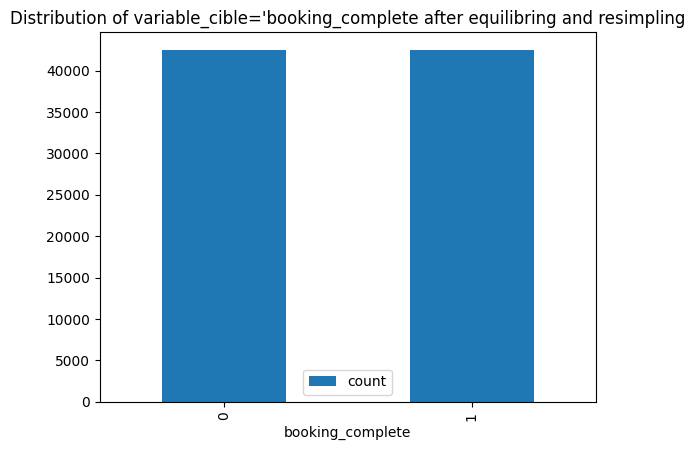

In [176]:
df1.booking_complete.value_counts().plot(kind='bar').legend()
plt.title("Distribution of variable_cible='booking_complete after equilibring and resimpling")

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85044 entries, 0 to 40119
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         85044 non-null  int64  
 1   sales_channel          85044 non-null  object 
 2   trip_type              85044 non-null  object 
 3   purchase_lead          85044 non-null  int64  
 4   length_of_stay         85044 non-null  int64  
 5   flight_hour            85044 non-null  int64  
 6   flight_day             85044 non-null  int64  
 7   route                  85044 non-null  object 
 8   booking_origin         85044 non-null  object 
 9   wants_extra_baggage    85044 non-null  int64  
 10  wants_preferred_seat   85044 non-null  int64  
 11  wants_in_flight_meals  85044 non-null  int64  
 12  flight_duration        85044 non-null  float64
 13  booking_complete       85044 non-null  int64  
dtypes: float64(1), int64(9), object(4)
memory usage: 9.7+ MB


In [28]:
df1.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [30]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
num_passengers,85044.0,1.614600,1.045917,1.00,1.00,1.0,2.00,9.0
purchase_lead,85044.0,82.535346,89.805112,0.00,20.00,49.0,111.00,867.0
length_of_stay,85044.0,21.529138,33.525746,0.00,5.00,6.0,27.00,778.0
flight_hour,85044.0,9.133108,5.348158,0.00,5.00,9.0,13.00,23.0
flight_day,85044.0,3.799680,1.982744,1.00,2.00,4.0,5.00,7.0
wants_extra_baggage,85044.0,0.700778,0.457920,0.00,0.00,1.0,1.00,1.0
wants_preferred_seat,85044.0,0.318059,0.465725,0.00,0.00,0.0,1.00,1.0
wants_in_flight_meals,85044.0,0.439149,0.496286,0.00,0.00,0.0,1.00,1.0
flight_duration,85044.0,7.117698,1.524456,4.67,5.62,7.0,8.83,9.5
booking_complete,85044.0,0.500000,0.500003,0.00,0.00,0.5,1.00,1.0


In [31]:
df1.describe(include='object').T

,count,unique,top,freq
sales_channel,85044,2,Internet,76575
trip_type,85044,3,RoundTrip,84420
route,85044,798,AKLKUL,5283
booking_origin,85044,104,Australia,22165


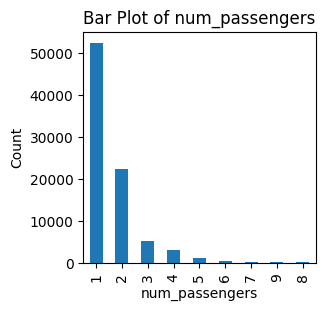

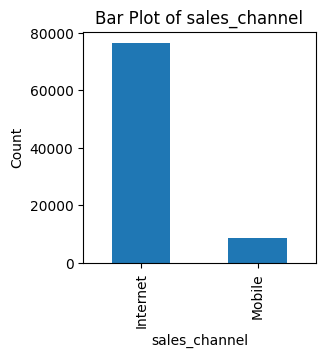

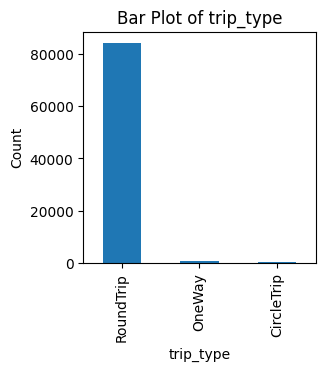

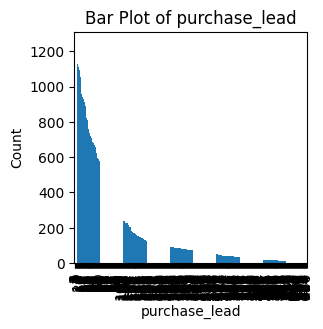

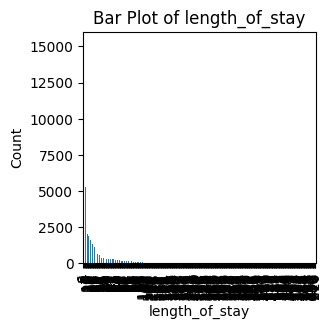

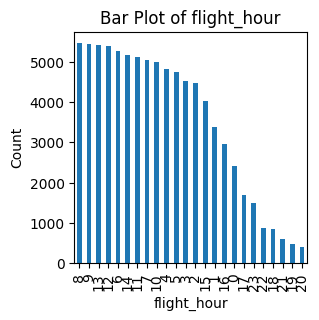

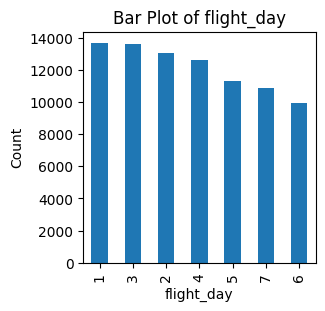

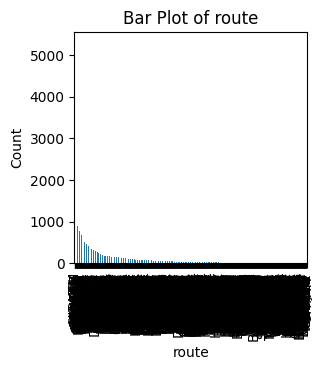

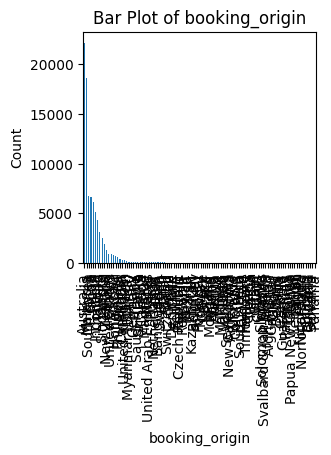

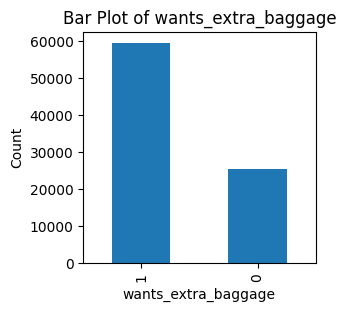

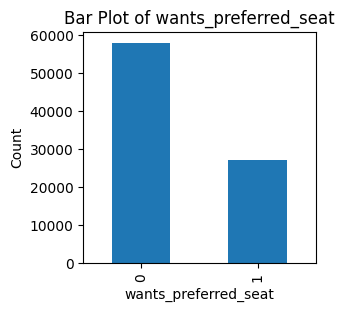

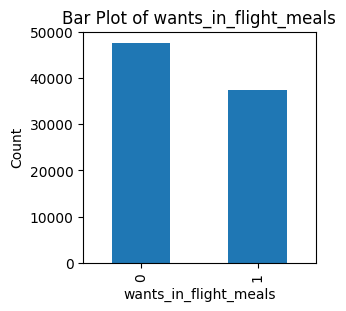

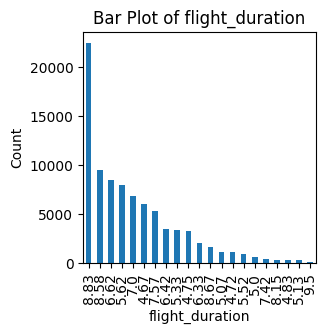

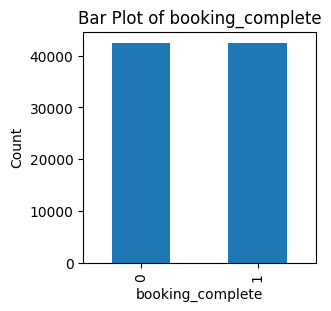

In [44]:
# Tracer les colonnes catégorielles avec des diagrammes à barres
for col in df1.columns:
    plt.figure(figsize=(3, 3))
    df1[col].value_counts().plot(kind='bar')
    plt.title(f'Bar Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()


In [47]:
y = df1.booking_complete         
X = df1.drop('booking_complete',axis=1)

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

df2 = X.copy()
df2['booking_complete'] = y
df2

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,6,0,0,1,0,0,5.52,0
1,1,0,0,112,20,3,6,0,0,0,0,0,5.52,0
2,2,0,0,243,22,17,3,0,1,1,1,0,5.52,0
3,1,0,0,96,31,4,6,0,0,0,0,1,5.52,0
4,2,0,0,68,22,15,3,0,1,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45222,1,1,0,58,6,3,4,259,4,1,0,0,6.62,1
5969,1,0,0,52,19,23,1,155,5,1,0,0,7.00,1
30073,1,0,0,28,4,16,4,107,9,1,0,0,4.67,1
47100,1,0,0,51,6,0,2,362,4,1,0,0,6.62,1


In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85044 entries, 0 to 40119
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         85044 non-null  int64  
 1   sales_channel          85044 non-null  int64  
 2   trip_type              85044 non-null  int64  
 3   purchase_lead          85044 non-null  int64  
 4   length_of_stay         85044 non-null  int64  
 5   flight_hour            85044 non-null  int64  
 6   flight_day             85044 non-null  int64  
 7   route                  85044 non-null  int64  
 8   booking_origin         85044 non-null  int64  
 9   wants_extra_baggage    85044 non-null  int64  
 10  wants_preferred_seat   85044 non-null  int64  
 11  wants_in_flight_meals  85044 non-null  int64  
 12  flight_duration        85044 non-null  float64
 13  booking_complete       85044 non-null  int64  
dtypes: float64(1), int64(13)
memory usage: 9.7 MB


In [51]:
correlation_matrix = df2.corr()
correlation_matrix

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.001391,-0.002194,0.216666,-0.124507,0.018544,0.018821,-0.029850,-0.136249,0.119607,0.035840,0.025611,-0.048515,0.032198
sales_channel,-0.001391,1.000000,-0.013690,-0.005023,-0.057705,0.016937,0.035105,-0.014361,-0.051363,-0.049985,0.037720,-0.007213,-0.018829,-0.060826
trip_type,-0.002194,-0.013690,1.000000,0.005185,-0.007784,-0.000542,-0.002601,-0.000546,0.017846,0.007962,-0.000988,-0.010529,0.036549,-0.044062
purchase_lead,0.216666,-0.005023,0.005185,1.000000,-0.081987,0.046605,0.048252,-0.124389,-0.085314,-0.013339,-0.006987,-0.009295,0.085221,-0.036129
length_of_stay,-0.124507,-0.057705,-0.007784,-0.081987,1.000000,-0.037173,-0.007467,-0.006963,0.116700,0.154500,0.010573,0.078336,0.132546,-0.063178
flight_hour,0.018544,0.016937,-0.000542,0.046605,-0.037173,1.000000,0.024946,-0.017286,0.001091,-0.010159,0.014694,0.022336,0.005619,0.015509
flight_day,0.018821,0.035105,-0.002601,0.048252,-0.007467,0.024946,1.000000,-0.005943,0.000845,-0.008762,0.002540,0.004318,0.014555,-0.010378
route,-0.029850,-0.014361,-0.000546,-0.124389,-0.006963,-0.017286,-0.005943,1.000000,0.184628,0.011152,0.002192,-0.031546,-0.229865,0.001653
booking_origin,-0.136249,-0.051363,0.017846,-0.085314,0.116700,0.001091,0.000845,0.184628,1.000000,0.015203,0.017498,0.058616,0.143840,-0.225249
wants_extra_baggage,0.119607,-0.049985,0.007962,-0.013339,0.154500,-0.010159,-0.008762,0.011152,0.015203,1.000000,0.203987,0.200448,0.033772,0.099247


Text(0.5, 1.0, 'Correlation Matrix')

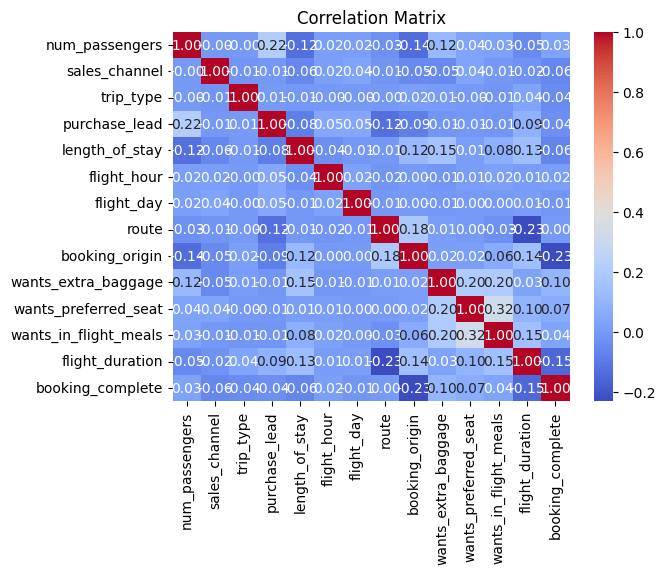

In [177]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')

In [127]:
y = df2.booking_complete         
X = df2.drop('booking_complete',axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85044 entries, 0 to 40119
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         85044 non-null  int64  
 1   sales_channel          85044 non-null  int64  
 2   trip_type              85044 non-null  int64  
 3   purchase_lead          85044 non-null  int64  
 4   length_of_stay         85044 non-null  int64  
 5   flight_hour            85044 non-null  int64  
 6   flight_day             85044 non-null  int64  
 7   route                  85044 non-null  int64  
 8   booking_origin         85044 non-null  int64  
 9   wants_extra_baggage    85044 non-null  int64  
 10  wants_preferred_seat   85044 non-null  int64  
 11  wants_in_flight_meals  85044 non-null  int64  
 12  flight_duration        85044 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 9.1 MB


In [128]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores

route                    0.122676
booking_origin           0.089501
flight_duration          0.029752
length_of_stay           0.022355
wants_extra_baggage      0.014708
purchase_lead            0.010380
wants_in_flight_meals    0.008672
wants_preferred_seat     0.006240
flight_day               0.005282
flight_hour              0.003958
num_passengers           0.003569
sales_channel            0.001876
trip_type                0.000304
Name: MI Scores, dtype: float64

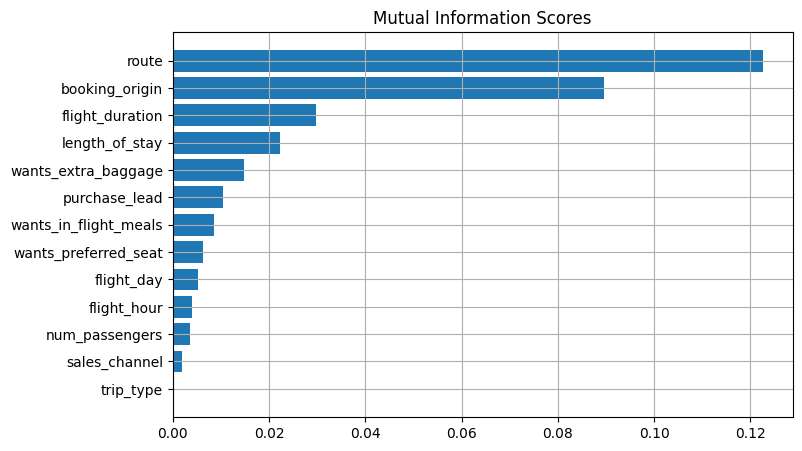

In [129]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.grid()
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [130]:
from sklearn.model_selection import train_test_split

def dataset(XX,yy):
    train_full_X, val_X, train_full_y, val_y = train_test_split(XX, yy,test_size=0.2)
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25)
    return (train_X, val_X, train_y, val_y)

### Model Training

In [63]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.8/124.9 MB 4.8 MB/s eta 0:00:27
    --------------------------------------- 2.4/124.9 MB 6.7 MB/s eta 0:00:19
   - -------------------------------------- 3.7/124.9 MB 6.6 MB/s eta 0:00:19
   - -------------------------------------- 5.0/124.9 MB 6.7 MB/s eta 0:00:18
   -- ------------------------------------- 6.3/124.9 MB 6.4 MB/s eta 0:00:19
   -- ------------------------------------- 7.9/124.9 MB 6.7 MB/s eta 0:00:18
   -- ------------------------------------- 9.2/124.9 MB 6.8 MB/s eta 0:00:18
   --- ------------------------------------ 10.0/124.9 MB 6.3 MB/s eta 0:00:19
   --- ------------------------------------ 11.3/124.9 MB 6.2 MB/s eta 0:00:19
   ---- ----------------------------------- 12.8/124.9 MB 6.3 MB/s eta 0:00:18
   ---- ----------------------------------- 14.4/124.9 MB 6.4 MB/s eta 0:00:18
   ---- ----------------------------------- 15.2/124.9 MB 6.2 MB/s 

In [131]:
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve, auc, confusion_matrix, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from xgboost import XGBClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [150]:
# Listes des scores pour chaque modèle
model_names = ['RandomForest_6_Topfeatures', 'RandomForest', 'XGBoost_6_Topfeatures', 'XGBoost']
accuracy_scores = []
overfitting_checks = []

Model 1 : Random forest classifier with top 6 features

In [151]:
top_6_features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','purchase_lead']
X_6= X[top_6_features]

scaler = StandardScaler()
X_6_scaled = scaler.fit_transform(X_6)

#one hot encoding
X_6_scaled = pd.get_dummies(X_6, columns=top_6_features)

pca = PCA(n_components=0.95)  # Garde suffisamment de composantes pour expliquer 95% de la variance
X_6_pca = pca.fit_transform(X_6_scaled)

X_train,X_val,y_train,y_val= dataset(X_6_pca,y)

forest_model= RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
predections_forest= forest_model.predict(X_val)

print("Scores for RandomForest_6_top_features")
accuracy_scores += [accuracy_score(y_val,predections_forest)]
print('ACCURACY: ',accuracy_score(y_val,predections_forest)*100,"%")
print('AUC score: ',roc_auc_score(y_val,predections_forest))

Scores for RandomForest_6_top_features
ACCURACY:  94.84978540772532 %
AUC score:  0.9484533215312608


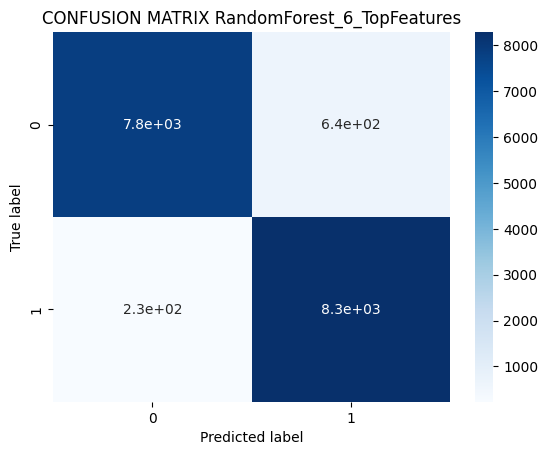

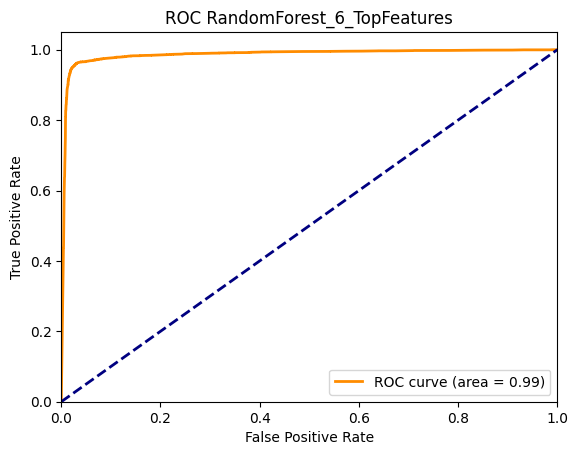

In [153]:
#CONFUSION MATRIX
cm = confusion_matrix(y_val, predections_forest)
#heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
#labels
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('CONFUSION MATRIX RandomForest_6_TopFeatures')
plt.show()



#Courbe ROC
pred_score = forest_model.predict_proba(X_val)
FPr, TPr, _ = roc_curve(y_val, pred_score[:, 1])
roc_auc = auc(FPr, TPr)
#PLOT
plt.plot(FPr, TPr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC RandomForest_6_TopFeatures')
plt.legend(loc="lower right")
plt.show()

In [154]:

#Checking : overfiting
overfitting_checks += [accuracy_score(y_train, forest_model.predict(X_train))-accuracy_score(y_val, predections_forest)]
print("Checking overfiting for RandomForest_6_TopFeatures\n")
print("Accuracy on the training set:", accuracy_score(y_train, forest_model.predict(X_train)))
print("Accuracy on the testing set:", accuracy_score(y_val, predections_forest))

Checking overfiting for RandomForest_6_TopFeatures

Accuracy on the training set: 0.9942382314898287
Accuracy on the testing set: 0.9484978540772532


Model 2 : Random forest classifier with all features

In [155]:
#one hot encoding
X_dum = pd.get_dummies(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_dum)

#pca = PCA(n_components=0.95)  
#X_pca = pca.fit_transform(X_scaled)

X_train,X_val,y_train,y_val= dataset(X_scaled,y)

forest_model= RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)
predections_forest2= forest_model.predict(X_val)

accuracy_scores += [accuracy_score(y_val,predections_forest2)]
print("Scores for RandomForest")
print('ACCURACY: ',accuracy_score(y_val,predections_forest2)*100,"%")
print('AUC score: ',roc_auc_score(y_val,predections_forest2))

Scores for RandomForest
ACCURACY:  93.83855605855723 %
AUC score:  0.9387263275480261


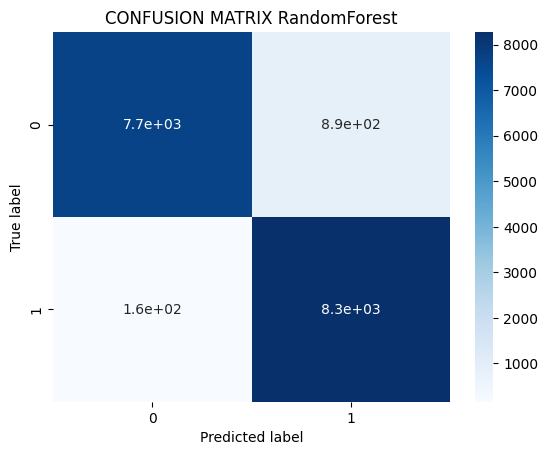

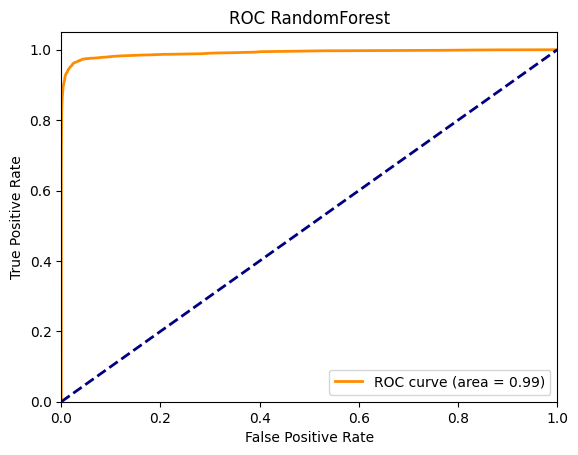

In [156]:
#CONFUSION MATRIX
cm = confusion_matrix(y_val, predections_forest2)
#heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
#labels
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('CONFUSION MATRIX RandomForest')

plt.show()



#Courbe ROC
pred_score = forest_model.predict_proba(X_val)
FPr, TPr, _ = roc_curve(y_val, pred_score[:, 1])
roc_auc = auc(FPr, TPr)
#PLOT
plt.plot(FPr, TPr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC RandomForest')
plt.legend(loc="lower right")
plt.show()

In [157]:
#Checking : overfiting
overfitting_checks += [accuracy_score(y_train, forest_model.predict(X_train))-accuracy_score(y_val, predections_forest2)]
print("Checking overfiting for RandomForest\n")
print("Accuracy on the training set:", accuracy_score(y_train, forest_model.predict(X_train)))
print("Accuracy on the testing set:", accuracy_score(y_val, predections_forest2))

Checking overfiting for RandomForest

Accuracy on the training set: 0.9998432171833967
Accuracy on the testing set: 0.9383855605855723


Model 3 : XGBoost classifier with top 6 features

In [158]:
X_train,X_val,y_train,y_val= dataset(X_6_pca,y)
  
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
predictions_xgb = xgb_model.predict(X_val)

accuracy_scores += [accuracy_score(y_val,predictions_xgb)]
print("Scores for XGBoost_6_top_features")
print('ACCURACY: ',accuracy_score(y_val, predictions_xgb)*100,"%")
print('AUC score: ',roc_auc_score(y_val,predictions_xgb))

Scores for XGBoost_6_top_features
ACCURACY:  88.07690046446 %
AUC score:  0.882256139176101


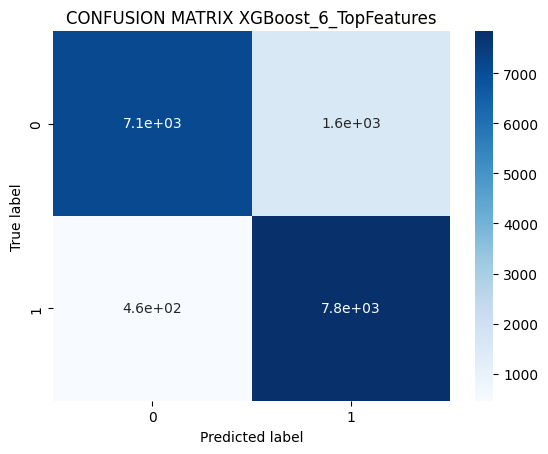

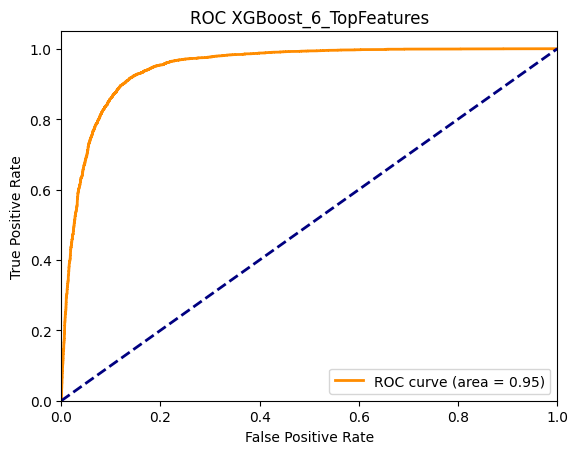

In [160]:
#CONFUSION MATRIX
cm = confusion_matrix(y_val, predictions_xgb)
#heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
#labels
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('CONFUSION MATRIX XGBoost_6_TopFeatures')
plt.show()



#Courbe ROC
pred_score = xgb_model.predict_proba(X_val)
FPr, TPr, _ = roc_curve(y_val, pred_score[:, 1])
roc_auc = auc(FPr, TPr)
#PLOT
plt.plot(FPr, TPr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC XGBoost_6_TopFeatures')
plt.legend(loc="lower right")
plt.show()

In [161]:
#Checking : overfiting
overfitting_checks += [accuracy_score(y_train, xgb_model.predict(X_train))-accuracy_score(y_val, predictions_xgb)]
print("Checking overfiting for XGBoost_6_topFeatures\n")
print("Accuracy on the training set:", accuracy_score(y_train, xgb_model.predict(X_train)))
print("Accuracy on the testing set:", accuracy_score(y_val, predictions_xgb))

Checking overfiting for XGBoost_6_topFeatures

Accuracy on the training set: 0.955297299415984
Accuracy on the testing set: 0.8807690046446


Model 4 : XGBoost classifier

In [162]:
X_train,X_val,y_train,y_val= dataset(X_scaled,y)

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
predictions_xgb2 = xgb_model.predict(X_val)

accuracy_scores += [accuracy_score(y_val,predictions_xgb2)]
print("Scores for XGBoost")
print('ACCURACY: ',accuracy_score(y_val, predictions_xgb2)*100,"%")
print('AUC score: ',roc_auc_score(y_val,predictions_xgb2))

Scores for XGBoost
ACCURACY:  80.17520136398377 %
AUC score:  0.8019486724281082


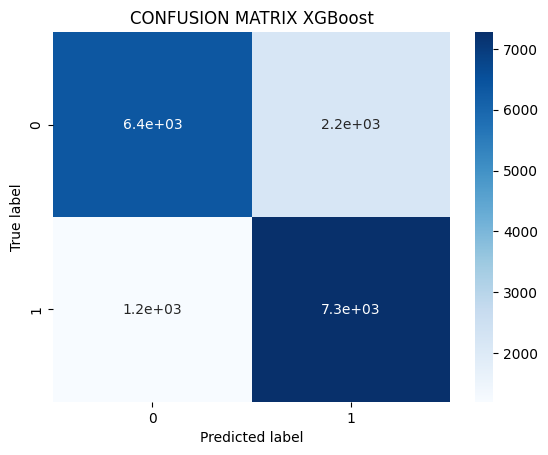

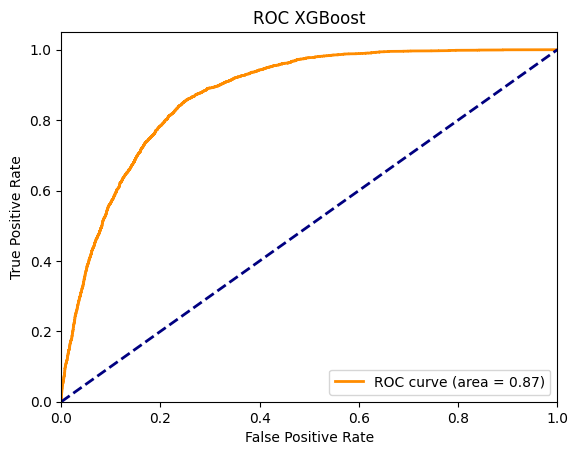

In [163]:
#CONFUSION MATRIX
cm = confusion_matrix(y_val, predictions_xgb2)
#heatmap
sns.heatmap(cm, annot=True, cmap="Blues")
#labels
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title('CONFUSION MATRIX XGBoost')
plt.show()



#Courbe ROC
pred_score = xgb_model.predict_proba(X_val)
FPr, TPr, _ = roc_curve(y_val, pred_score[:, 1])
roc_auc = auc(FPr, TPr)
#PLOT
plt.plot(FPr, TPr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC XGBoost')
plt.legend(loc="lower right")
plt.show()

In [164]:
#Checking : overfiting
overfitting_checks += [accuracy_score(y_train, xgb_model.predict(X_train))-accuracy_score(y_val, predictions_xgb2)]
print("Checking overfiting for XGBoost\n")
print("Accuracy on the training set:", accuracy_score(y_train, xgb_model.predict(X_train)))
print("Accuracy on the testing set:", accuracy_score(y_val, predictions_xgb2))

Checking overfiting for XGBoost

Accuracy on the training set: 0.8372594363657743
Accuracy on the testing set: 0.8017520136398377


In [165]:
print(accuracy_scores)
print(overfitting_checks)
df_scores = pd.DataFrame({
    'Model': model_names,
    'Accuracy Score': accuracy_scores,
    'Overfitting Check': overfitting_checks
})
df_scores

[0.9484978540772532, 0.9383855605855723, 0.8807690046446, 0.8017520136398377]
[0.04574037741257553, 0.06145765659782443, 0.07452829477138401, 0.035507422725936544]


,Model,Accuracy Score,Overfitting Check
0,RandomForest_6_Topfeatures,0.948498,0.045740
1,RandomForest,0.938386,0.061458
2,XGBoost_6_Topfeatures,0.880769,0.074528
3,XGBoost,0.801752,0.035507


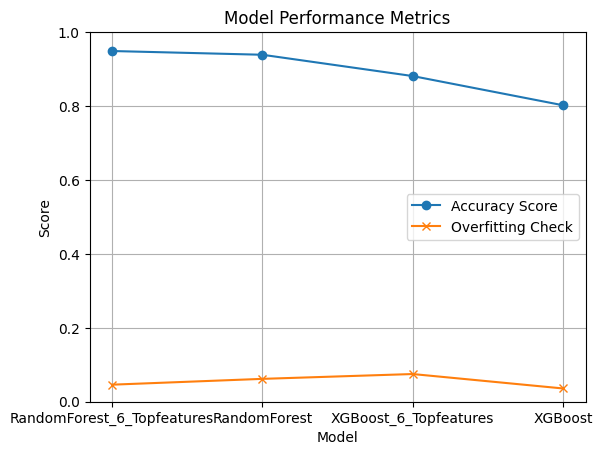

In [170]:
plt.plot(df_scores['Model'], df_scores['Accuracy Score'], label='Accuracy Score', marker='o')
plt.plot(df_scores['Model'], df_scores['Overfitting Check'], label='Overfitting Check', marker='x')

plt.title('Model Performance Metrics')
plt.xlabel('Model')
plt.ylabel('Score')
plt.legend()
plt.ylim(0,1)
plt.grid(True)


#### Alors On choisit le medéle qui a the highest Accuracy score et un low overfitting check ==>  RandomForest_6_Top_Features